## Analysing Incidence of Fraud Cases Per 100,000 population

* The dataset will be scrappped from wikipedia using BeautifulSoup and Request modules from Python

In [1]:
# Import the libraries for scrapping

from bs4 import BeautifulSoup
import requests

In [8]:
# Specify the web address for data extraction and import html

url = 'https://en.wikipedia.org/wiki/Fraud#United_Kingdom'

In [9]:
# Extract details from the website using request.get
page = requests.get(url)

In [51]:
# Import site information into jupyter using BeautifulSoup and html parser
soup = BeautifulSoup(page.content, 'html.parser')

In [52]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Fraud - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [53]:
# Find the table of interest
table = soup.find('table', {'class': 'wikitable sortable sticky-header col1left'})


In [54]:
table

<table class="wikitable sortable sticky-header col1left" style="text-align:center;">
<tbody><tr>
<th>Country</th>
<th>Reported annual frauds<br/>per 100,000<sup class="reference" id="cite_ref-f967_47-1"><a href="#cite_note-f967-47"><span class="cite-bracket">[</span>47<span class="cite-bracket">]</span></a></sup></th>
<th>Year
</th></tr>
<tr>
<td><span class="flagicon" style="display:inline-block;width:25px;"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="500" data-file-width="700" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/21px-Flag_of_Albania.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/32px-Flag_of_Albania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/42px-Flag_of_Albania.svg.png 2x" width="21"/></span></span></span> <a href="/wiki/Albania" title="Albania">Albania</a></td>
<td>34

In [55]:
# Find the headers
fraud_table = table.find_all('th')

In [56]:
fraud_table

[<th>Country</th>,
 <th>Reported annual frauds<br/>per 100,000<sup class="reference" id="cite_ref-f967_47-1"><a href="#cite_note-f967-47"><span class="cite-bracket">[</span>47<span class="cite-bracket">]</span></a></sup></th>,
 <th>Year
 </th>]

In [57]:
# strip the headers off tags
fraud_table_titles = [title.text.strip() for title in fraud_table]

In [58]:
fraud_table_titles

['Country', 'Reported annual fraudsper 100,000[47]', 'Year']

In [3]:
# put the headers in a data frame and remove the superscript[47]
import pandas as pd

In [60]:
df = pd.DataFrame(columns =fraud_table_titles )

In [61]:
df

,Country,"Reported annual fraudsper 100,000[47]",Year


In [63]:
# rename the column to remove superscript

df = df.rename(columns={"Reported annual fraudsper 100,000[47]" : "Reported annual fraud per 100,000"})

df

,Country,"Reported annual fraud per 100,000",Year


In [64]:
# To import data from the table into the columns
column_data = table.find_all('tr')

In [70]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    rows = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = rows


In [78]:
df

,Country,"Reported annual fraud per 100,000",Year
0,Albania,34.1,2022
1,Algeria,3.1,2022
2,Antigua and Barbuda,25.6,2022
3,Armenia,53.1,2018
4,Australia,32.2,2022
...,...,...,...
91,Ukraine,58.5,2020
92,United Arab Emirates,45.4,2016
93,United States of America,272.1,2022
94,Uruguay,576.8,2022


In [77]:
# observed presence of duplicate values, hence the need to drop them
df = df.drop_duplicates()

In [79]:
# To save the pandas data frame as csv

df.to_csv('fraud.csv', index =False)

# Exploratory Data Analysis of Dataset

In [4]:
df2 = pd.read_csv(r"C:\Users\ADACHUKWU\OneDrive\Desktop\Data Science projects\10alytics\Forage Projects\WebScrappingPython\fraud.csv")

In [5]:
df2

,Country,"Reported annual fraud per 100,000",Year
0,Albania,34.1,2022
1,Algeria,3.1,2022
2,Antigua and Barbuda,25.6,2022
3,Armenia,53.1,2018
4,Australia,32.2,2022
...,...,...,...
91,Ukraine,58.5,2020
92,United Arab Emirates,45.4,2016
93,United States of America,272.1,2022
94,Uruguay,576.8,2022


In [82]:
# overview of data types in the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            96 non-null     object 
 1   Reported annual fraud per 100,000  96 non-null     float64
 2   Year                               96 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [86]:
# missing values
df2.isna().sum()

Country                              0
Reported annual fraud per 100,000    0
Year                                 0
dtype: int64

### There are no missing values in our data set

In [87]:
# Statistical analysis of the dataset
df2.describe()

,"Reported annual fraud per 100,000",Year
count,96.000000,96.000000
mean,245.564583,2021.031250
std,385.237452,1.905411
min,0.000000,2014.000000
25%,30.125000,2020.000000
50%,99.750000,2022.000000
75%,297.850000,2022.000000
max,2357.800000,2022.000000


In [93]:
# Statistical analysis of categorical variables

df2.describe(include=['bool', 'object'])

,Country
count,96
unique,96
top,Albania
freq,1


## Observations
* We have 96 unique countries in the dataset
* Annually, 245 fraud cases are reported on average
* 2357 fraud cases are the most reported

## Visualization of the data 

In [91]:
!pip install missingno


In [6]:
## Data Visualisation using matplotlib and seaborns

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

In [94]:
df2.head()

,Country,"Reported annual fraud per 100,000",Year
0,Albania,34.1,2022
1,Algeria,3.1,2022
2,Antigua and Barbuda,25.6,2022
3,Armenia,53.1,2018
4,Australia,32.2,2022


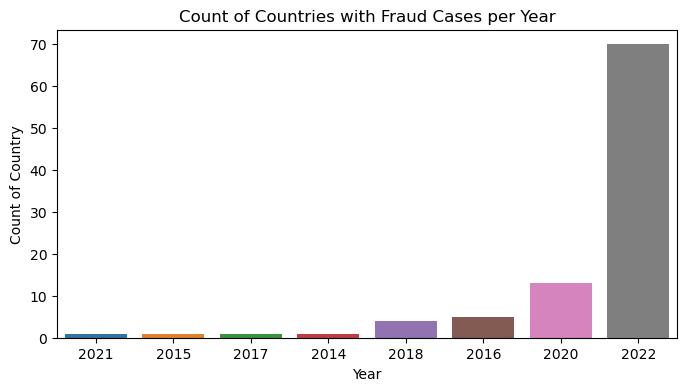

In [41]:
# Fraud cases reported by countries by year
plt.figure(figsize=(8,4))
sns.countplot(x=df2['Year'], order = df2["Year"].value_counts(ascending=True).index)
plt.ylabel("Count of Country")
plt.xlabel("Year")
plt.title("Count of Countries with Fraud Cases per Year")
plt.show();

## Observation
* The data available demonstrates that year 2022 has highest of number of countries reporting fraud cases.

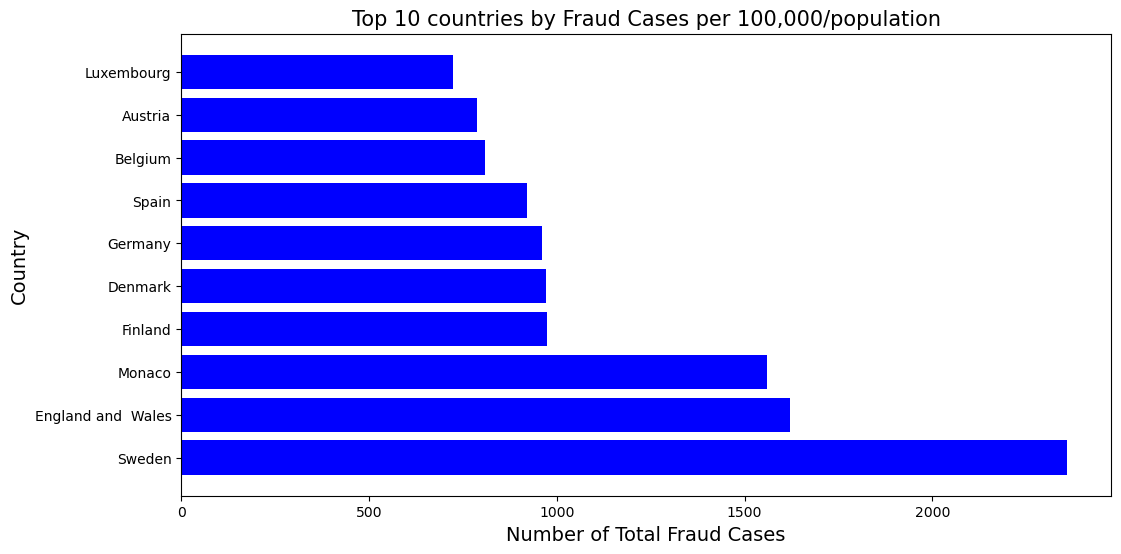

In [127]:
# Top ten countries by reported fraud cases

# Group by country and calculate the sum of reported fraud cases
df2_country = df2.groupby("Country")["Reported annual fraud per 100,000"].sum().reset_index()

# Sort by reported fraud in ascending order

df2_country_sorted = df2_country.sort_values(by="Reported annual fraud per 100,000", ascending = False)

# Select the top ten countries
df2_top10 = df2_country_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(12,6))
plt.barh(df2_top10["Country"], df2_top10["Reported annual fraud per 100,000"], color ='b')
plt.ylabel("Country", fontsize= 14)
plt.xlabel("Number of Total Fraud Cases", fontsize = 14)
plt.title("Top 10 countries by Fraud Cases per 100,000/population", fontsize = 15);

## Observation
* Sweden has the highest number of fraud case per 100,000 population over the period of time, followed closely by England and Wales, and Monaco.


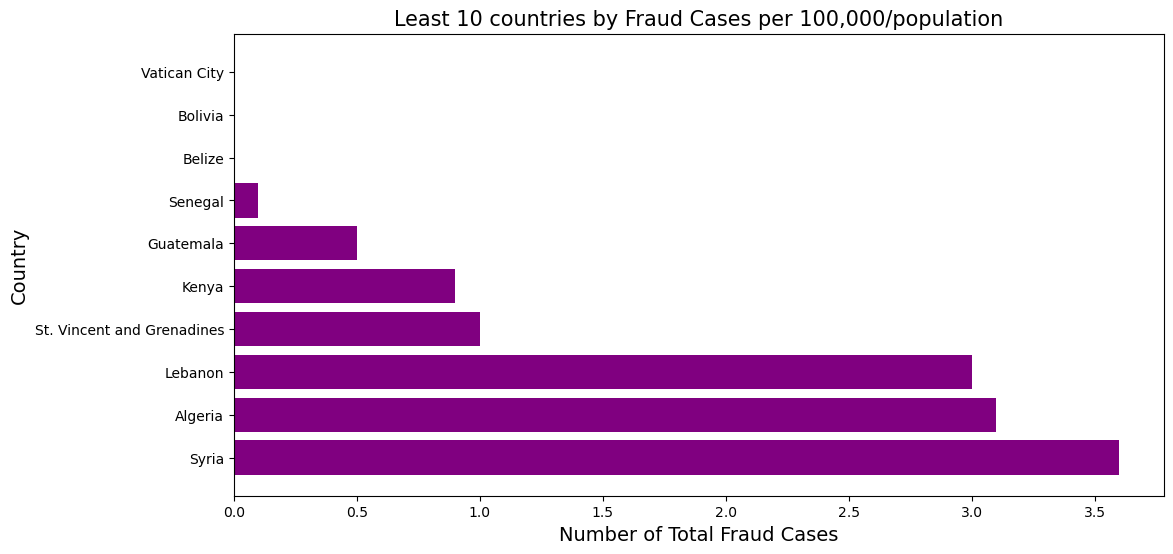

In [83]:
# bottom ten countries by reported fraud cases

# Select the top ten countries
df2_least10 = df2_country_sorted.tail(10)

# Plot the bar chart
plt.figure(figsize=(12,6))
plt.barh(df2_least10["Country"], df2_least10["Reported annual fraud per 100,000"], color ='purple')
plt.ylabel("Country", fontsize= 14)
plt.xlabel("Number of Total Fraud Cases", fontsize = 14)
plt.title("Least 10 countries by Fraud Cases per 100,000/population", fontsize = 15);

## Observation
* Vatican city, Bolivia, Belize all reproted zero fraud cases within the period.

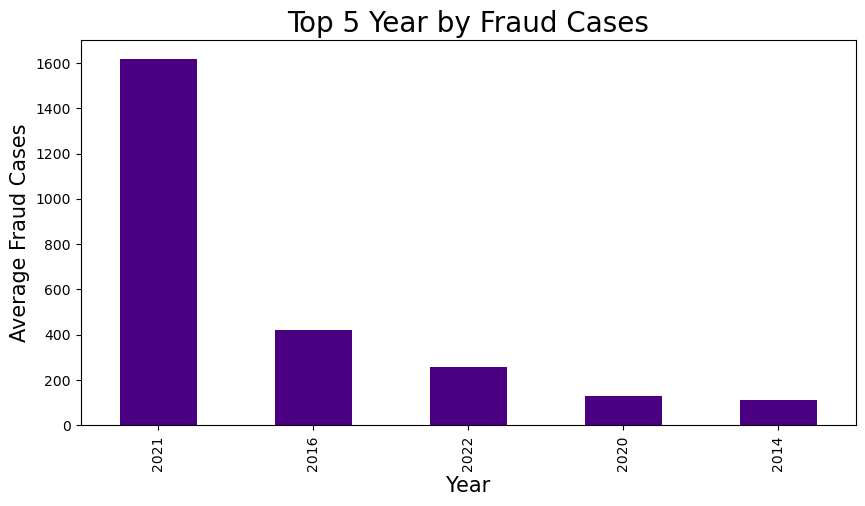

In [116]:
# Top three years by fraud cases

# Group by year and number of fraud cases
df2_annual = df2.groupby("Year")["Reported annual fraud per 100,000"].mean().reset_index()

# Sort in asceding order
df2_annual_sorted = df2_annual.sort_values(by = "Reported annual fraud per 100,000", ascending = False)


# Select top 3 years
df2_top3 = df2_annual_sorted.head(5)
# Set year as index to eliminate other years showing on the chart
df2_top3 = df2_top3.set_index("Year")

# Plot the graph
plt.figure(figsize=(10,5))
df2_top3["Reported annual fraud per 100,000"].plot(kind = 'bar', color='indigo')
plt.title("Top 5 Year by Fraud Cases", fontsize= 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Average Fraud Cases", fontsize = 15)
plt.show();

# Observations
* On average, 2021 has the highest average followed closely by year 2016 and 2022.

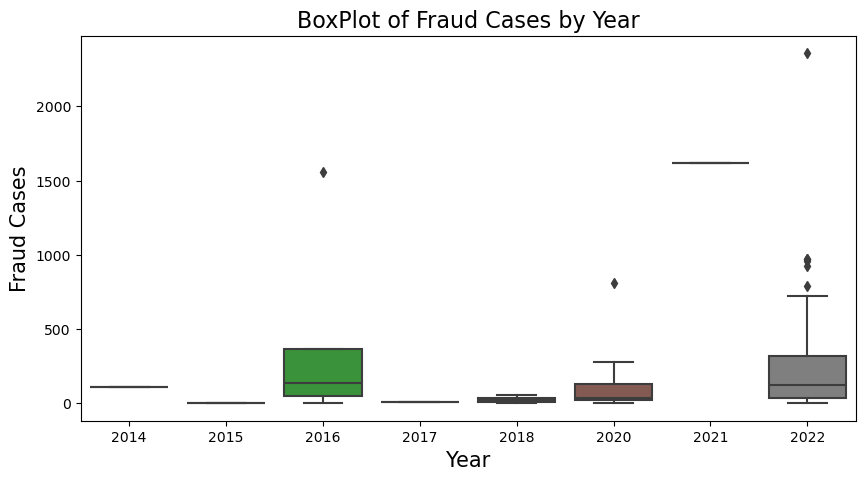

In [121]:
#Box plot distribution of fraud cases by year

plt.figure(figsize = (10,5))
sns.boxplot(x= "Year", y = "Reported annual fraud per 100,000", data = df2 )
plt.title("BoxPlot of Fraud Cases by Year", fontsize=16)
plt.xlabel("Year", fontsize= 15)
plt.ylabel("Fraud Cases", fontsize = 15)
plt.show();

## Observation
* Presence of outliers in the number of fraud cases reported in 2022.
* As seen above, 202i had the highest average of cases irrespective of year 2022 having the highest total number. The outliers seen in the box plot could provide answers to this.

# Conclusion
- According to the data available;
* On average, year 2021 has the highest reported fraud cases in the world, followed by 2016.
* Year 2022 has the highest number of countries reporting fraud cases in the data
* Bolivia, Belize, and Vatican City have no reported incidence of fraud cases
* Sweden, England, and Monaco has the highest cases of fraud per 1000000 persons.